In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [70]:
url='https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/ex1data2.txt'
df=pd.read_csv(url,header=None)

In [71]:
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [72]:
df.columns = ['Size', 'Bedrooms', 'Price']
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [73]:
df.dtypes

Size        int64
Bedrooms    int64
Price       int64
dtype: object

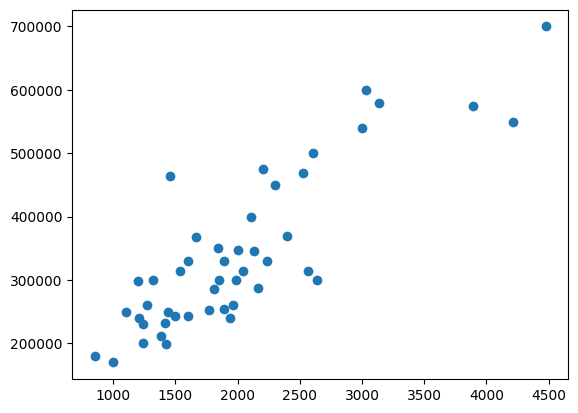

In [74]:
plt.plot(df.Size,df.Price,'o')
plt.show()

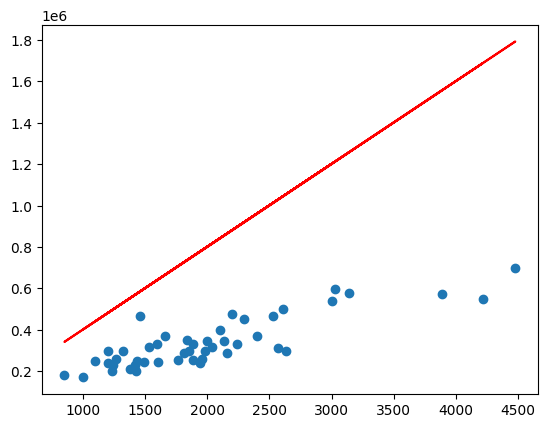

In [75]:
# y = 1000 + 400*x
plt.plot(df.Size,df.Price,'o')
plt.plot(df.Size,1000+df['Size']*400,'r')
plt.show()

In [76]:
# gradient
# przyporządkowanie zmiennej zależnej i niezależnej
X = df['Size'].values
y = df['Price'].values

X = np.column_stack(([1]*len(X),X)) # dodanie kolumny z jedynkami - technikalia


In [77]:
# działanie fukcji regresji liniowej
from pandas.core.computation.pytables import Constant
def gradientDescent(X,y,theta,alpha,m,numIterations):
  '''
  param: X - zmienne niezalezne
  param: y - zmienna zalezna
  param: theta - macierz [Theta_0 czyli punkt przeciecia/wyraz wolny, Theta_1 czyli wspolczynnik od X1]
  param: alpha - wspolczynnik uczenia - jak duze kroki zrobic
  param: m - liczba obserwacji
  param: numIterations - liczba iteracji naszego modelu, czyli ile krokow zrobic
  '''
  xTrans=X.transpose()                        # potrzebne do obliczenia gradientow (technikalia)
  cost_array=np.empty([numIterations,2])      # macierz, do ktorej bede zapisywac wartosc funkcji kosztu po kazdej iteracji
  for i in range(0,numIterations):            #petla
    hypothesis=np.dot(X,theta)                #bierzemy kazdy x, mnozymy przez theta_1 i dodajemy theta_0 - przewiduje cene domu
    loss=hypothesis-y                         #odleglosc kropek od linii, innymi slowy reszty/roznice
    cost=np.sum(loss**2)/(2*m)                #wartosc funkcji kosztu
    print('Iteration %d | Cost %f' %(i,cost))
    cost_array[i][0]=i
    cost_array[i][1]=cost
    gradient=np.dot(xTrans,loss)/m            #pochodna cząstkowa funkcji
    theta=theta-alpha*gradient
  return theta,cost_array

In [78]:
m=len(X)
numIterations=100
alpha=0.00000005
theta=[10000,200] #theta0, theta1
theta,cost_array=gradientDescent(X,y,theta,alpha,m,numIterations)

Iteration 0 | Cost 5813726085.180851
Iteration 1 | Cost 4381421212.050714
Iteration 2 | Cost 3534504409.234169
Iteration 3 | Cost 3033725500.251567
Iteration 4 | Cost 2737616702.642472
Iteration 5 | Cost 2562528617.402239
Iteration 6 | Cost 2458999650.999535
Iteration 7 | Cost 2397783338.262231
Iteration 8 | Cost 2361586347.859973
Iteration 9 | Cost 2340183194.191640
Iteration 10 | Cost 2327527583.817212
Iteration 11 | Cost 2320044364.828128
Iteration 12 | Cost 2315619562.556095
Iteration 13 | Cost 2313003191.262743
Iteration 14 | Cost 2311456138.805644
Iteration 15 | Cost 2310541370.791275
Iteration 16 | Cost 2310000470.329744
Iteration 17 | Cost 2309680636.428803
Iteration 18 | Cost 2309491518.402610
Iteration 19 | Cost 2309379692.210452
Iteration 20 | Cost 2309313568.406162
Iteration 21 | Cost 2309274468.262042
Iteration 22 | Cost 2309251347.112525
Iteration 23 | Cost 2309237674.285952
Iteration 24 | Cost 2309229588.219293
Iteration 25 | Cost 2309224805.583994
Iteration 26 | Cost 23

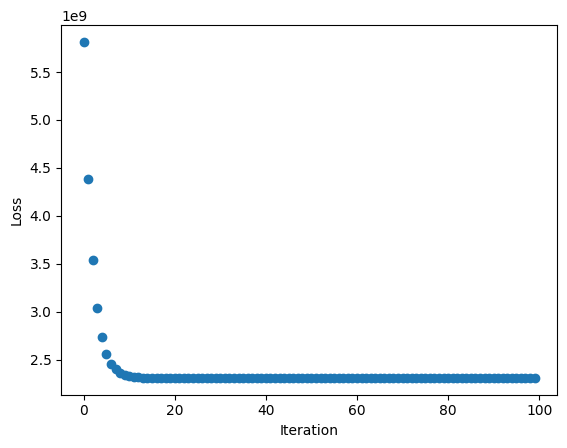

In [79]:
#funkcja kosztu
epoch=range(len(cost_array[:,0]))
plt.plot(epoch,cost_array[:,1],'o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [80]:
theta

array([10000.02411714,   161.05351593])

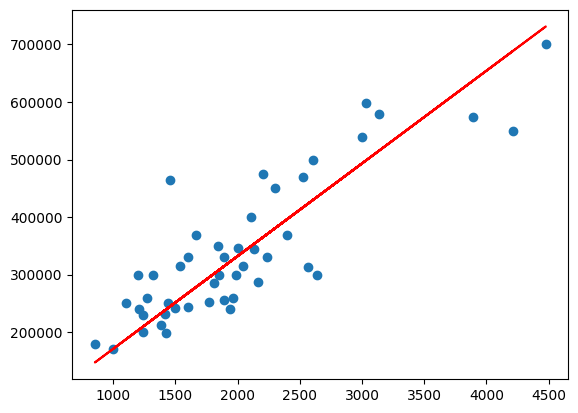

In [81]:
plt.plot(df['Size'],df['Price'],'o')
plt.plot(df['Size'],theta[0]+df["Size"]*theta[1],'r')
plt.show()

# Regresja jednej zmiennej

In [82]:
X = df[['Size']] # tabelka, można pisać kolejne kolumne
y = df['Price'] # wektor

In [83]:
X.values[:5]

array([[2104],
       [1600],
       [2400],
       [1416],
       [3000]], dtype=int64)

In [84]:
y.values[:5]

array([399900, 329900, 369000, 232000, 539900], dtype=int64)

In [85]:
# budowanie instancji
model=LinearRegression() # wybieramy model
model.fit(X,y) # dopasowujemy dane

LinearRegression()

In [86]:
#theta 0, wyraz wolny
model.intercept_

71270.49244872917

In [87]:
# współczynnik regresji, theta 1
model.coef_

array([134.52528772])

In [88]:
# chcemy przewidziec jak abedzie cena mieszkania dla danych [3200],[3720]
predict_data=np.array([[3200],[3720]])
predict_data

array([[3200],
       [3720]])

In [89]:
model.predict(predict_data)

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([501751.4131535 , 571704.56276803])

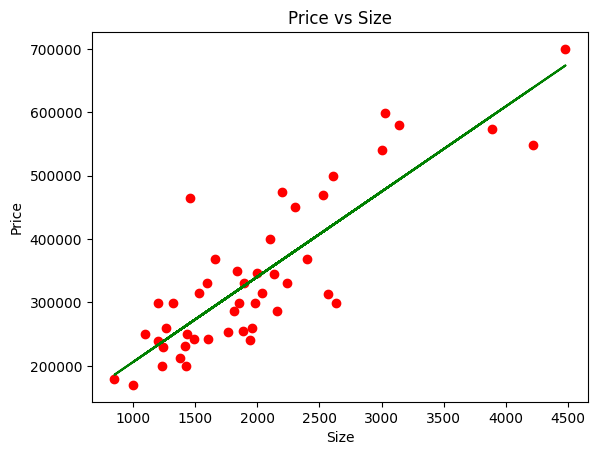

In [90]:
import matplotlib.pyplot as plt

plt.scatter(X,y,color='red')
plt.plot(X,model.predict(X),color='green')
plt.title('Price vs Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [91]:
import plotly.express as px
import plotly.graph_objects as go

x_range=np.linspace(X['Size'].min(),X['Size'].max(),50)
y_range=model.predict(x_range.reshape(-1,1))

fig=px.scatter(x=X['Size'],y=y,opacity=0.65)
fig.add_traces(go.Scatter(x=x_range,y=y_range,name='Regression Fit'))
fig.show()

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



# Regresja wielu zmiennych

In [92]:
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [93]:
X=df[['Size','Bedrooms']] #features
y=df['Price'] # target

In [94]:
X.values[:5]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4]], dtype=int64)

In [95]:
y.values[:5]

array([399900, 329900, 369000, 232000, 539900], dtype=int64)

In [96]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [97]:
model.intercept_ # teta 0
# mieszkanie bez size i bedroomes to 895k

89597.90954279754

In [98]:
model.coef_ # teta 1, teta 2
# jesli powierzchnia rosnie o stope, to cena rosnie o 139, 
# jesli liczba sypialni rosnie, to cena spada o 8738

array([  139.21067402, -8738.01911233])

In [99]:
predict_data=np.array([[3200,3],[3720,2],[5000,10]])
predict_data

array([[3200,    3],
       [3720,    2],
       [5000,   10]])

In [100]:
model.predict(predict_data)

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([508858.00906222, 589985.57866371, 698271.08850765])

# Zadania: 
# regresja liniowa jednej oraz wielu zmiennych

## zad1

In [101]:
%matplotlib inline
# nasze wykresy wyświetlają się w oknie, a nie nie wyświetlają się

In [102]:
#wczytamy dane

url='https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Cookbook/master/Chapter01/bike_day.csv'
df=pd.read_csv(url)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [103]:
#atemp - temperatura odczuwalna danego dnia, wedlug dokumentacji zmienna zostala 
# znormalizowana i wystandaryzowana - przyjmuje wartosci od 0 do 1
#cnt - ilosc wypozyczonych rowerow danego dnia
#cnt zalezy od atemp

In [104]:
#przypisz atemp jako zmienną niezależną i cnt jako zmienną zależną
X=df['atemp'].values
y=df['cnt'].values

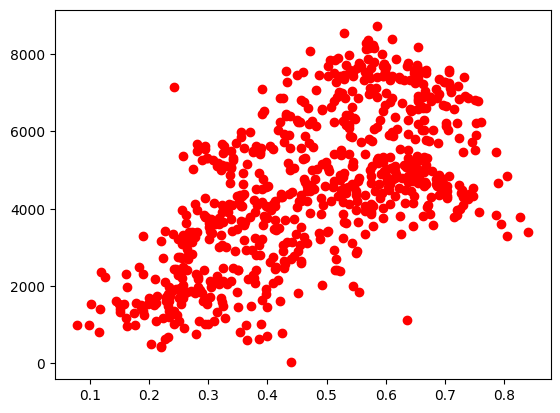

In [105]:
#stwórz wykres zależności atemp i cnt
plt.scatter(X,y,color='red')
plt.show()

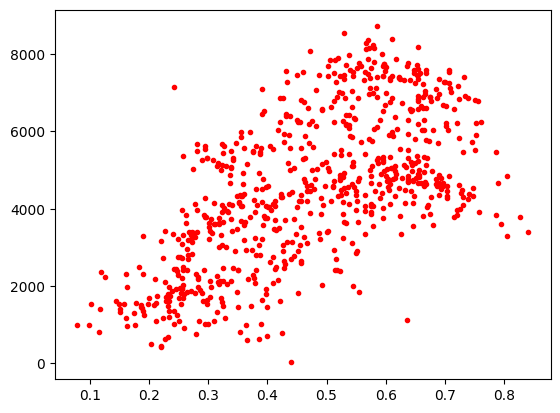

In [106]:
#stwórz wykres zależności atemp i cnt
plt.plot(df['atemp'],df['cnt'],'r.')
plt.show()

In [107]:
X=np.column_stack(([1]*len(X),X))
X

array([[1.      , 0.363625],
       [1.      , 0.353739],
       [1.      , 0.189405],
       ...,
       [1.      , 0.2424  ],
       [1.      , 0.2317  ],
       [1.      , 0.223487]])

In [108]:
#przy wykorzystaniu funkcji gradientDescent wyćwicz model (osiągnij minimum lokalne funkcji kosztu)
m=len(X)
numIterations=3000
alpha=0.1
theta=[0,0]
theta,cost_array=gradientDescent(X,y,theta,alpha,m,numIterations)

Iteration 0 | Cost 12018406.441176
Iteration 1 | Cost 9602195.925103
Iteration 2 | Cost 7743383.111946
Iteration 3 | Cost 6313285.769408
Iteration 4 | Cost 5212929.980661
Iteration 5 | Cost 4366191.511097
Iteration 6 | Cost 3714520.598765
Iteration 7 | Cost 3212884.610151
Iteration 8 | Cost 2826647.397878
Iteration 9 | Cost 2529169.107907
Iteration 10 | Cost 2299960.109109
Iteration 11 | Cost 2123261.117322
Iteration 12 | Cost 1986951.120161
Iteration 13 | Cost 1881707.424619
Iteration 14 | Cost 1800359.620924
Iteration 15 | Cost 1737392.694038
Iteration 16 | Cost 1688564.849698
Iteration 17 | Cost 1650613.571348
Iteration 18 | Cost 1621029.538464
Iteration 19 | Cost 1597882.739398
Iteration 20 | Cost 1579688.728820
Iteration 21 | Cost 1565305.761734
Iteration 22 | Cost 1553855.675734
Iteration 23 | Cost 1544663.038831
Iteration 24 | Cost 1537208.345975
Iteration 25 | Cost 1531092.020889
Iteration 26 | Cost 1526006.728651
Iteration 27 | Cost 1521716.080354
Iteration 28 | Cost 1518038.2

Iteration 2672 | Cost 1127591.161815
Iteration 2673 | Cost 1127591.143567
Iteration 2674 | Cost 1127591.125398
Iteration 2675 | Cost 1127591.107307
Iteration 2676 | Cost 1127591.089294
Iteration 2677 | Cost 1127591.071358
Iteration 2678 | Cost 1127591.053500
Iteration 2679 | Cost 1127591.035719
Iteration 2680 | Cost 1127591.018014
Iteration 2681 | Cost 1127591.000386
Iteration 2682 | Cost 1127590.982833
Iteration 2683 | Cost 1127590.965356
Iteration 2684 | Cost 1127590.947955
Iteration 2685 | Cost 1127590.930628
Iteration 2686 | Cost 1127590.913376
Iteration 2687 | Cost 1127590.896198
Iteration 2688 | Cost 1127590.879094
Iteration 2689 | Cost 1127590.862064
Iteration 2690 | Cost 1127590.845108
Iteration 2691 | Cost 1127590.828224
Iteration 2692 | Cost 1127590.811413
Iteration 2693 | Cost 1127590.794675
Iteration 2694 | Cost 1127590.778008
Iteration 2695 | Cost 1127590.761414
Iteration 2696 | Cost 1127590.744891
Iteration 2697 | Cost 1127590.728439
Iteration 2698 | Cost 1127590.712058
I

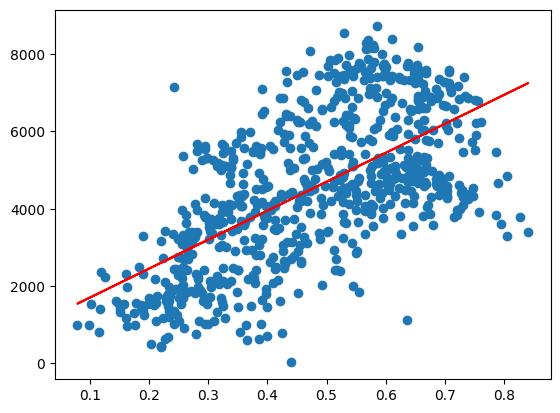

In [109]:
#narysuj prostą regresji na wykresie z naszymi obserwacjami
plt.plot(df['atemp'],df['cnt'],'o')
plt.plot(df['atemp'],theta[0]+df['atemp']*theta[1],'r')
plt.show()

In [110]:
theta

array([ 950.08406197, 7493.04678383])

In [111]:
#na podstawie wytrenowanych wspolczynnikow theta stworz funkcję
#zdolna do predykcji ilosci wypozyczonych rowerow w zaleznosci od temperatury
def predict_price(x,theta_0,theta_1):
  result=theta_0+theta_1*x
  return result

In [112]:
#stworz predykcję ilości wypożyczonych rowerów na dzień, w którym unormalizowana temperatura wynosila 0.8
predict_price(x=0.8,theta_0=theta[0],theta_1=theta[1])

6944.521489037999

## zad2 sklearn - regresja wielu zmiennych

In [113]:
#jako zmienną zależną ponownie wybierzemy cnt
y=df['cnt']
#jako zmienne niezależne atemp (temperatura), hum (wilgotnosc), windspeed (predkosc wiatru), workingday (czy dany dzien jest pracujacy)
X=df[['atemp','hum','windspeed','workingday']]

In [114]:
#wytrenuj model (metoda fit)
reg=LinearRegression().fit(X,y)

In [115]:
#sprawdz wielkosc interceptu i wspolczynnikow regresji
print(reg.intercept_)
print(reg.coef_)

3698.437392796488
[ 7486.28341042 -3174.17132979 -4407.19069508   127.65517425]


In [116]:
#napisz wzór końcowy modelu

### y=3698+7486∗atemp−3174∗hum−4407∗windspeed+127∗workingday

In [117]:
#zinterpretuj współczynniki modelu
#3698 - w dniu z temperaturą znormalizowaną 0, wilgotnością znormalizowaną 0, wiatrem znormalizowanym 0 i w dniu niepracującym tyle będzie
#wypożyczeń rowerów
#7486*atemp - wraz ze wzrostem atemp o jednostkę liczba wypożyczeń rowerów rośnie o 7486
#-3174*hum - wraz ze wzrostem hum o jednostkę liczba wypożyczeń rowerów spada o 3174
#-4407*windspeed - wraz ze wzrostem windspeed o jednostkę liczba wypożyczeń rowerów spada o 4407
#127*workingday (zmienna binarna) - w dniu pracującym liczba wypożyczeń rowerów w stosunku do dnia wolnego wzrasta o 127

In [118]:
#stwórz predykcję ilości wypożyczonych rowerów w dzień, gdzie atemp=0.5,hum=0.3, windspeed=0.25, dzień jest pracujący
reg.predict([[0.5,0.3,0.25,1]])

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([5515.18519955])

# Regresja wielomianowa

In [119]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # data set z zmiennymi podniesionymi do poteg

In [120]:
url='https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/ex1data2.txt'
df=pd.read_csv(url,header=None)

In [121]:
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [122]:
df.columns=['Size','Bedrooms','Price']
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [123]:
X=df[['Size']]
y=df['Price']

In [124]:
X.values[:5]

array([[2104],
       [1600],
       [2400],
       [1416],
       [3000]], dtype=int64)

In [125]:
y.values[:5]

array([399900, 329900, 369000, 232000, 539900], dtype=int64)

In [126]:
# features (X) muszą by przetransformowane
poly=PolynomialFeatures(degree=3) # podniesione az do potegi 3
X_poly=poly.fit_transform(X)
X_poly[:5]

array([[1.00000000e+00, 2.10400000e+03, 4.42681600e+06, 9.31402086e+09],
       [1.00000000e+00, 1.60000000e+03, 2.56000000e+06, 4.09600000e+09],
       [1.00000000e+00, 2.40000000e+03, 5.76000000e+06, 1.38240000e+10],
       [1.00000000e+00, 1.41600000e+03, 2.00505600e+06, 2.83915930e+09],
       [1.00000000e+00, 3.00000000e+03, 9.00000000e+06, 2.70000000e+10]])

In [127]:
model=LinearRegression()
model.fit(X_poly,y)

LinearRegression()

In [128]:
model.intercept_

236407.0358523208

In [129]:
model.coef_

array([ 0.00000000e+00, -1.07855433e+02,  1.06190390e-01, -1.38299983e-05])

In [130]:
predict_data=np.array([[3200],[3720]])
predict_data

array([[3200],
       [3720]])

In [131]:
predict_data_poly=poly.transform(predict_data)
predict_data_poly

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



array([[1.0000000e+00, 3.2000000e+03, 1.0240000e+07, 3.2768000e+10],
       [1.0000000e+00, 3.7200000e+03, 1.3838400e+07, 5.1478848e+10]])

In [132]:
model.predict(predict_data_poly)

array([525477.86332531, 592737.54295217])

In [133]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

x_range=np.linspace(X['Size'].min(),X['Size'].max(),50)
y_range=model.predict(poly.fit_transform(x_range.reshape(-1,1)))

fig=px.scatter(x=X['Size'],y=y,opacity=0.65)
fig.add_traces(go.Scatter(x=x_range,y=y_range,name='Polynomial Regression Fit'))
fig.show()

# Zad 3: regresja wielomianowa

In [134]:
#wracamy do zbioru danych z wypożyczeniami rowerów
url='https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Cookbook/master/Chapter01/bike_day.csv'
df=pd.read_csv(url)
df.head()

#jako zmienną zależną wybieramy cnt, jako niezależną atemp
y=df['cnt']
X=df[['atemp']]
#formatujemy zmienną atemp na dwa stopnie potęgi
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)
X_poly[:5]
#trenujemy model na podstawie rozszerzonego zbioru (atemp i jej potęgi)
poly_reg_model=LinearRegression()
poly_reg_model.fit(X_poly,y)
print(poly_reg_model.intercept_)
print(poly_reg_model.coef_)
#stworzymy predykcję ilości wypożyczonych rowerów na dzień, w którym znormalizowana temperatura równała się 0.8
predict_data=np.array([[0.8]])
predict_data_poly=poly.transform(predict_data)
predict_data_poly

poly_reg_model.predict(predict_data_poly)

-2155.0968932330416
[     0.          22767.32495365 -16460.45125404]


C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



array([5524.0742671])

In [135]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

x_range=np.linspace(X['atemp'].min(),X['atemp'].max(),50)
y_range=poly_reg_model.predict(poly.fit_transform(x_range.reshape(-1,1)))

fig=px.scatter(x=X['atemp'],y=y,opacity=0.65)
fig.add_traces(go.Scatter(x=x_range,y=y_range,name='Polynomial Regression Fit'))
fig.show()

# Drzewo decyzyjne

In [136]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [137]:
url='https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/ex1data2.txt'
df=pd.read_csv(url,header=None)

In [138]:
df.columns=['Size','Bedrooms','Price']
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [139]:
X=df[['Size','Bedrooms']]
y=df['Price']

In [140]:
X.values[:5]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4]], dtype=int64)

In [141]:
y.values[:5]

array([399900, 329900, 369000, 232000, 539900], dtype=int64)

In [154]:
model=DecisionTreeRegressor()
model.fit(X,y)

DecisionTreeRegressor()

In [155]:
predict_data=np.array([[3200,3],[3720,2]])
predict_data

array([[3200,    3],
       [3720,    2]])

In [144]:
model.predict(predict_data)

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



array([579900., 573900.])

In [156]:
model=DecisionTreeRegressor(max_depth=3,min_samples_leaf=3) 
# max_depth = ile moze miec poziomow
# min_samples_leaf = minimalna liczba obserwacji w liściu
model.fit(X,y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=3)

In [157]:
model.predict(predict_data)

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



array([572933.33333333, 607600.        ])

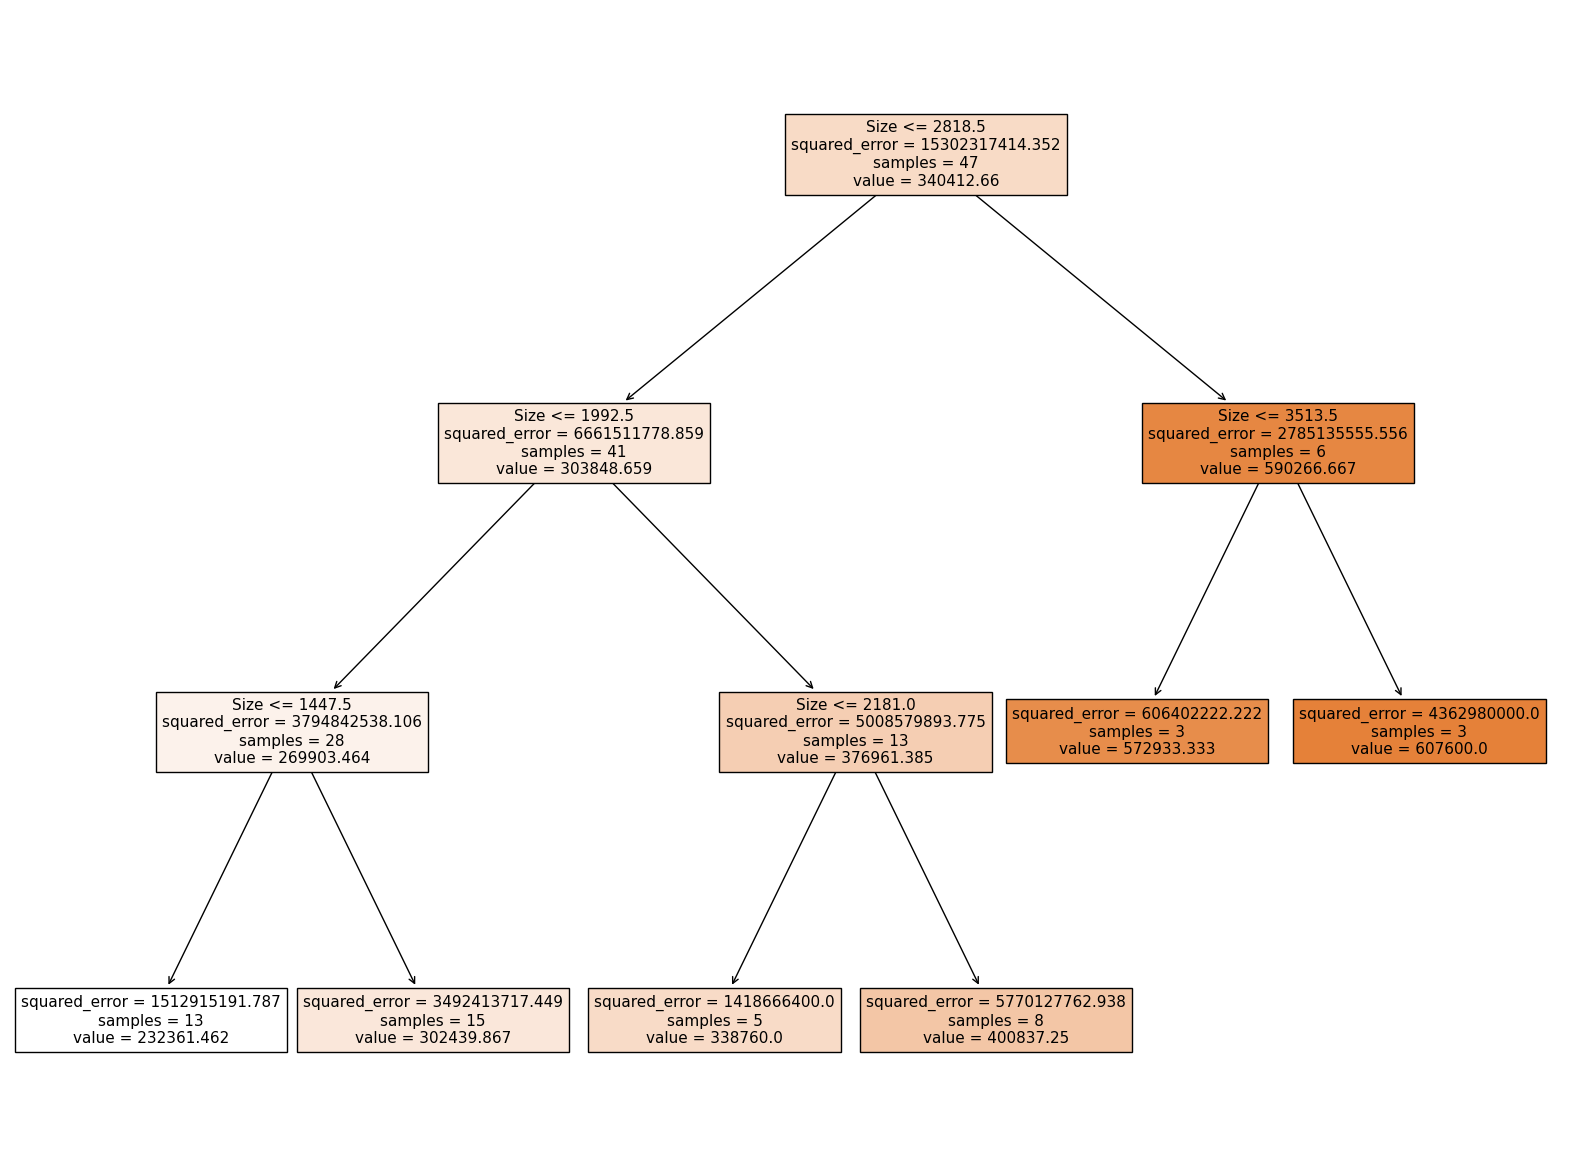

In [158]:
from sklearn import tree
fig = plt.figure(figsize=(20,15))
_=tree.plot_tree(model,feature_names=X.columns,filled=True)

In [159]:
#value = 232361 - Size<=1447.5
#value = 338760 - 1992.5 <=Size <= 2181
#value = 400837 - 2181 <=Size <= 2818.5
#value = 572933 - 2818.5 <=Size <= 3513.5
#value = 607600 - Size>= 3513.5

#### Które cechy były ważne w tworzeniu drzewa

In [161]:
feat_importance=model.tree_.compute_feature_importances(normalize=False)
feat_importance=pd.concat([X.columns.to_series().reset_index(drop=True),pd.Series(feat_importance)],axis=1)
feat_importance=feat_importance.sort_values(feat_importance.columns[1],ascending=False)
feat_importance.columns = ['Feature', 'Importance']
feat_importance

,Feature,Importance
0,Size,1.231899e+10
1,Bedrooms,0.000000e+00
